In [43]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt

Load the dataset

In [3]:

netflix_dataset = pd.read_csv("~/Desktop/netflix_titles.csv")

Visualize top 5 rows

In [3]:
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Understanding what content is available in different countries

Decided to drop Nan values in country because we don't have the information to know if it is available in the country or not, and I want show only results in which it is known the movie is available for the country searched.

In [22]:
country = "United States"
netflix_dataset_with_countries_defined = netflix_dataset.dropna(subset=['country'])
netflix_dataset_with_countries_defined[netflix_dataset_with_countries_defined['country'].str.contains(country)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
...,...,...,...,...,...,...,...,...,...,...,...,...
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


Identifying similar content by matching text-based features

In [ ]:
#Downloading model for calculating distances between text based attributes.
! python -m spacy download en_core_web_sm

In [ ]:
'''
Function for calculating distance between text attributes, only description and title are considered, and a
maximum between both is taken.
'''

def movie_text_based_distance(movie1, movie2):
    nlp = spacy.load('en_core_web_sm')
    description1 = nlp(movie1['description'])
    description2 = nlp(movie2['description'])
    title1 = nlp(movie1['title'])
    title2 = nlp(movie2['title'])

    return max(description1.similarity(description2), title1.similarity(title2))

'''
Function for generating a top 5 list of movies similar to a specific one. It receives a threshold that
determines the minimum similarity rate of the las recommendation (The fifth one). This parameter was 
added considering looking for similarity in all the set takes a long time. This can be optimized loooking for
better functions to calculate text distance and founding ways to avoid using for loops.
'''

def find_top_5_similarities(movie_index, threshold = 0.6):
    top5 = [(0,0),(0,0),(0,0),(0,0),(0,0)]
    for index in range(len(netflix_dataset['title'])):
        if index != movie_index:
            distance = movie_text_based_distance(netflix_dataset.loc[movie_index], netflix_dataset.loc[index])
            for position in range(5):
                if(distance > top5[position][1]):
                    top5[position] = (index, distance)
                    break
                if(distance > threshold and position == 4):
                    return top5
    return top5

'''
Function for printing the top 5 similarities from the list generated in the find_top_5_similarities() function.
''' 

def show_top_5_similarities(top5):
    print("Top 5 similarities: ")
    for top5_index in range(5):
        print(str(top5_index + 1) + ". Movie: " + str(netflix_dataset.loc[top5[top5_index][0]]["title"]) + ", Similarity: " + str(top5[top5_index][1]))

'''
Function for calculating and printing the top 5 similarities to a movie considering a certain threshold.
''' 

def top5_similarities_to_movie(movie_index, threshold = 0.6):
    top5 = find_top_5_similarities(movie_index, threshold)
    print("Selected title: " + str(netflix_dataset.loc[[movie_index]]["title"]))
    show_top_5_similarities(top5)

In [67]:
top5_similarities_to_movie(movie_index = 4,threshold = 0.7)

Selected title: 4    Kota Factory
Name: title, dtype: object
Top 5 similarities: 
1. Movie: Titipo Titipo, Similarity: 0.824686177676897
2. Movie: Tughlaq Durbar, Similarity: 0.7657636245303548
3. Movie: Yowamushi Pedal, Similarity: 0.7520960268125407
4. Movie: Blood Brothers: Malcolm X & Muhammad Ali, Similarity: 0.7495876126770367
5. Movie: Paradise Hills, Similarity: 0.7293214016177003


Does Netflix has more focus on TV Shows than movies in recent years.

In [29]:
groups = netflix_dataset.groupby("type")
tv_shows = groups.get_group("TV Show")
movies = groups.get_group("Movie")

<AxesSubplot:title={'center':'Movies and TV shows count through years'}>

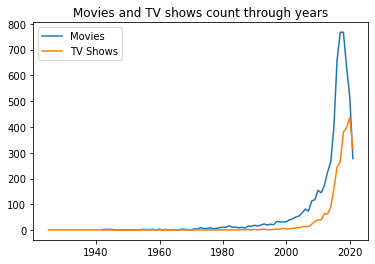

In [62]:
movies.release_year.value_counts().sort_index().plot(label="Movies", legend= True, title= "Movies and TV shows count through years")
tv_shows.release_year.value_counts().sort_index().plot(label="TV Shows", legend= True)